## dataset practice

### import Library

Text(0.5, 1.0, 'test')

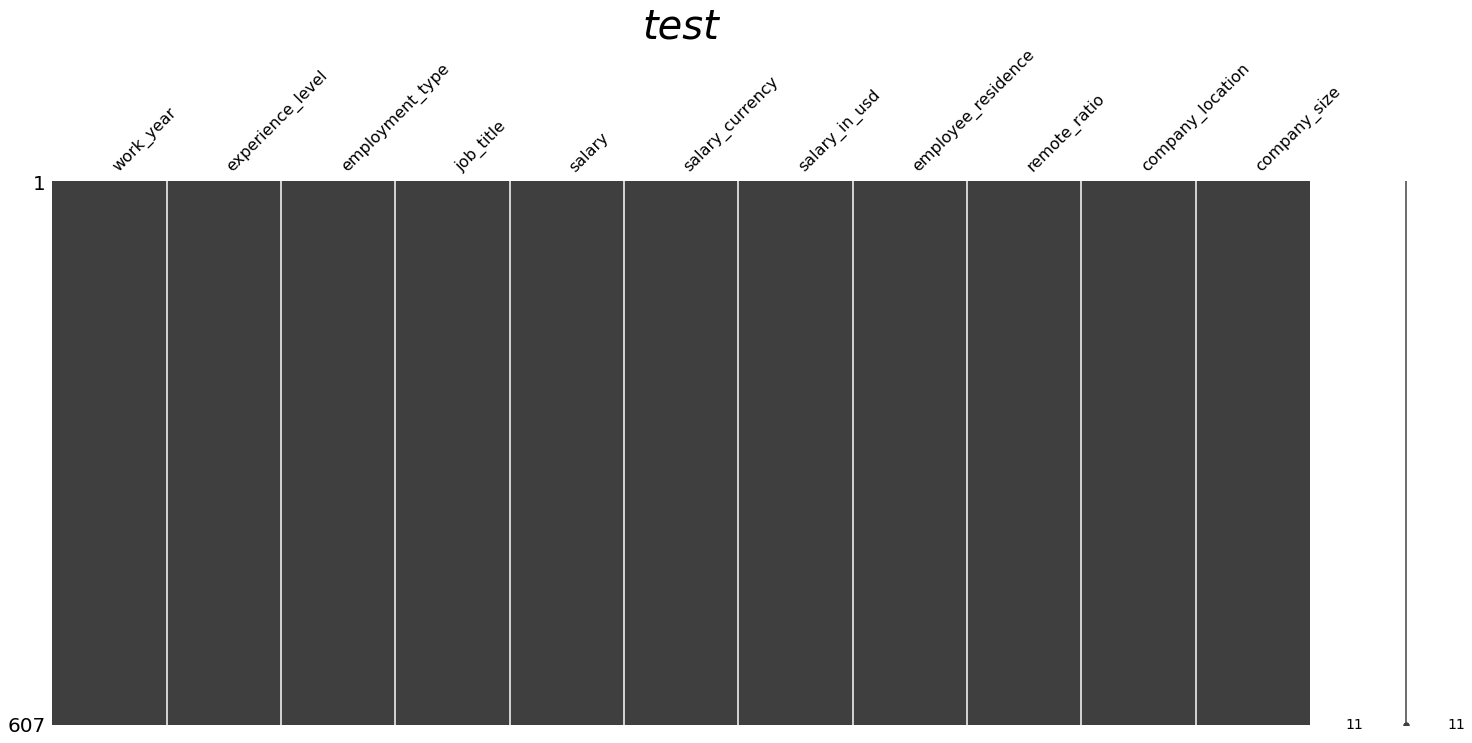

In [250]:
# data
import os
import numpy as np # 데이터 행렬을 다루는 라이브러리
import pandas as pd # DB형식인 csv형식 데이터를 다루기 위한 라이브러리 (ORM과 비슷한 기능)

# visualization lib
import matplotlib.pyplot as plt # 데이터를 그래프로 시각화
import seaborn as sb # 데이터 시각화 툴
import missingno as msno # 입력된 데이터의 결함(결측치)를 그래프로 시각화
from wordcloud import WordCloud #
import plotly.express as px # ??
import plotly.graph_objects as go # ??
import pycountry # ??

## csv 데이터 로드
df = pd.read_csv("./ds_salaries.csv")

## 0번 인덱스 안쓰는 데이터 컬럼 삭제
### inplace 옵션 넣을 시 mutation
df.drop(df.columns[0], axis=1, inplace=True)
# df.drop(df[['Unnamed: 0']], axis=1, inplace=True)
df.head(3)

msno.matrix(df)
plt.title('test', fontsize=40, fontstyle='oblique')

In [251]:
df.isnull() # csv의 null 유무를 Bool값으로 변환
df.isnull().sum() # null 값이 true인 값들을 컬럼 단위로 합산

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [252]:
print(df.shape)
df

(607, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [253]:
def get_ex_level(df):
    ## 데이터 변환
    df['experience_level'] = df['experience_level'].replace('EN', 'Entry-level/Junior')
    df['experience_level'] = df['experience_level'].replace('MI', 'Mid-level/Intermediate')
    df['experience_level'] = df['experience_level'].replace('SE', 'Senior-level/Expert')
    df['experience_level'] = df['experience_level'].replace('EX', 'Executive-level/Director')

    ## 해당 컬럼의 개수를 가져옴
    ex_level = df['experience_level'].value_counts()
    fig2 = px.treemap(
        ex_level,
        path=[ex_level.index],
        values=ex_level.values
    )
    fig2.show()
get_ex_level(df)

/Users/tospace01/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [254]:
type_grouped = df['employment_type'].value_counts()
type_grouped

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [255]:
def get_top7_title(df):
    top_title = df['job_title'].value_counts()[:7]

    fig = px.bar(
        x=top_title.index,
        y=top_title.values,
    )

    fig.update_layout(
        xaxis_title="Job Title",
        yaxis_title="Count",
        font = dict(size=13)
    )
    fig.show()
get_top7_title(df)

In [256]:
# def get_two_top10_title(df):
## get data
experience_level = df['salary_currency'].value_counts()
top_title = df['job_title'].value_counts()


# fig = go.Figure(data=[
    # go.Bar(
    #     name='experience_level',
    #     xaxis=experience_level.index,
    #     yaxis=experience_level.values
    # ),
    # go.Bar(
    #     name='top_title',
    #     xaxis=top_title.index,
    #     yaxis=top_title.values
    # )
# ])

# fig.show()

### Pandas

In [257]:
df['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [258]:
def findSalaryCurrency(x):
    return x[:2]

df['salary_currency'] = df['salary_currency'].apply(lambda x: findSalaryCurrency(x))[:10]
df['salary_currency'].head(10)

0    EU
1    US
2    GB
3    US
4    US
5    US
6    US
7    HU
8    US
9    US
Name: salary_currency, dtype: object

In [268]:
df_test = df[(df['work_year'] > 2020) & (df['job_title'] == 'Data Engineer')]
df_test.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
81,2021,Mid-level/Intermediate,FT,Data Engineer,140000,NaN,140000,US,100,US,L
85,2021,Mid-level/Intermediate,FT,Data Engineer,110000,NaN,28476,PL,100,PL,L
101,2021,Senior-level/Expert,FT,Data Engineer,150000,NaN,150000,US,100,US,L
107,2021,Senior-level/Expert,FT,Data Engineer,115000,NaN,115000,US,100,US,S
108,2021,Senior-level/Expert,FT,Data Engineer,150000,NaN,150000,US,100,US,M
